<a href="https://colab.research.google.com/github/kabir993/kabiropedia/blob/main/decision_tree_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [ ]:
dataset=pd.read_csv('/content/Social_Network_Ads (1).csv')
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


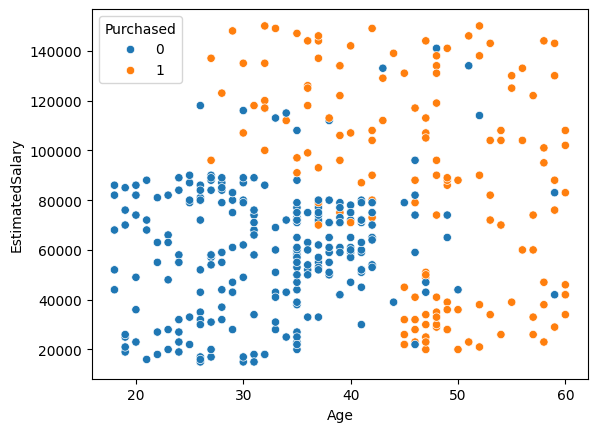

In [ ]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=dataset,hue='Purchased')
plt.show()

In [ ]:
dataset.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
print(dataset.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [ ]:
dataset.drop(columns=['User ID','Gender'],inplace=True)

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset["Purchased"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=dataset.iloc[:,:-1] # Keep x as a DataFrame
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns) # Now x.columns is valid
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_test,y_test)

0.8375

In [ ]:
dt.predict([[35	,20000	]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


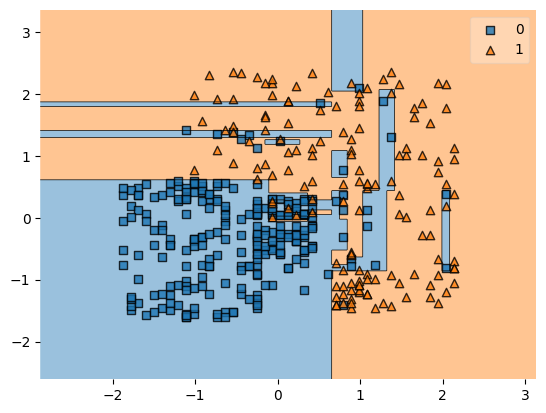

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

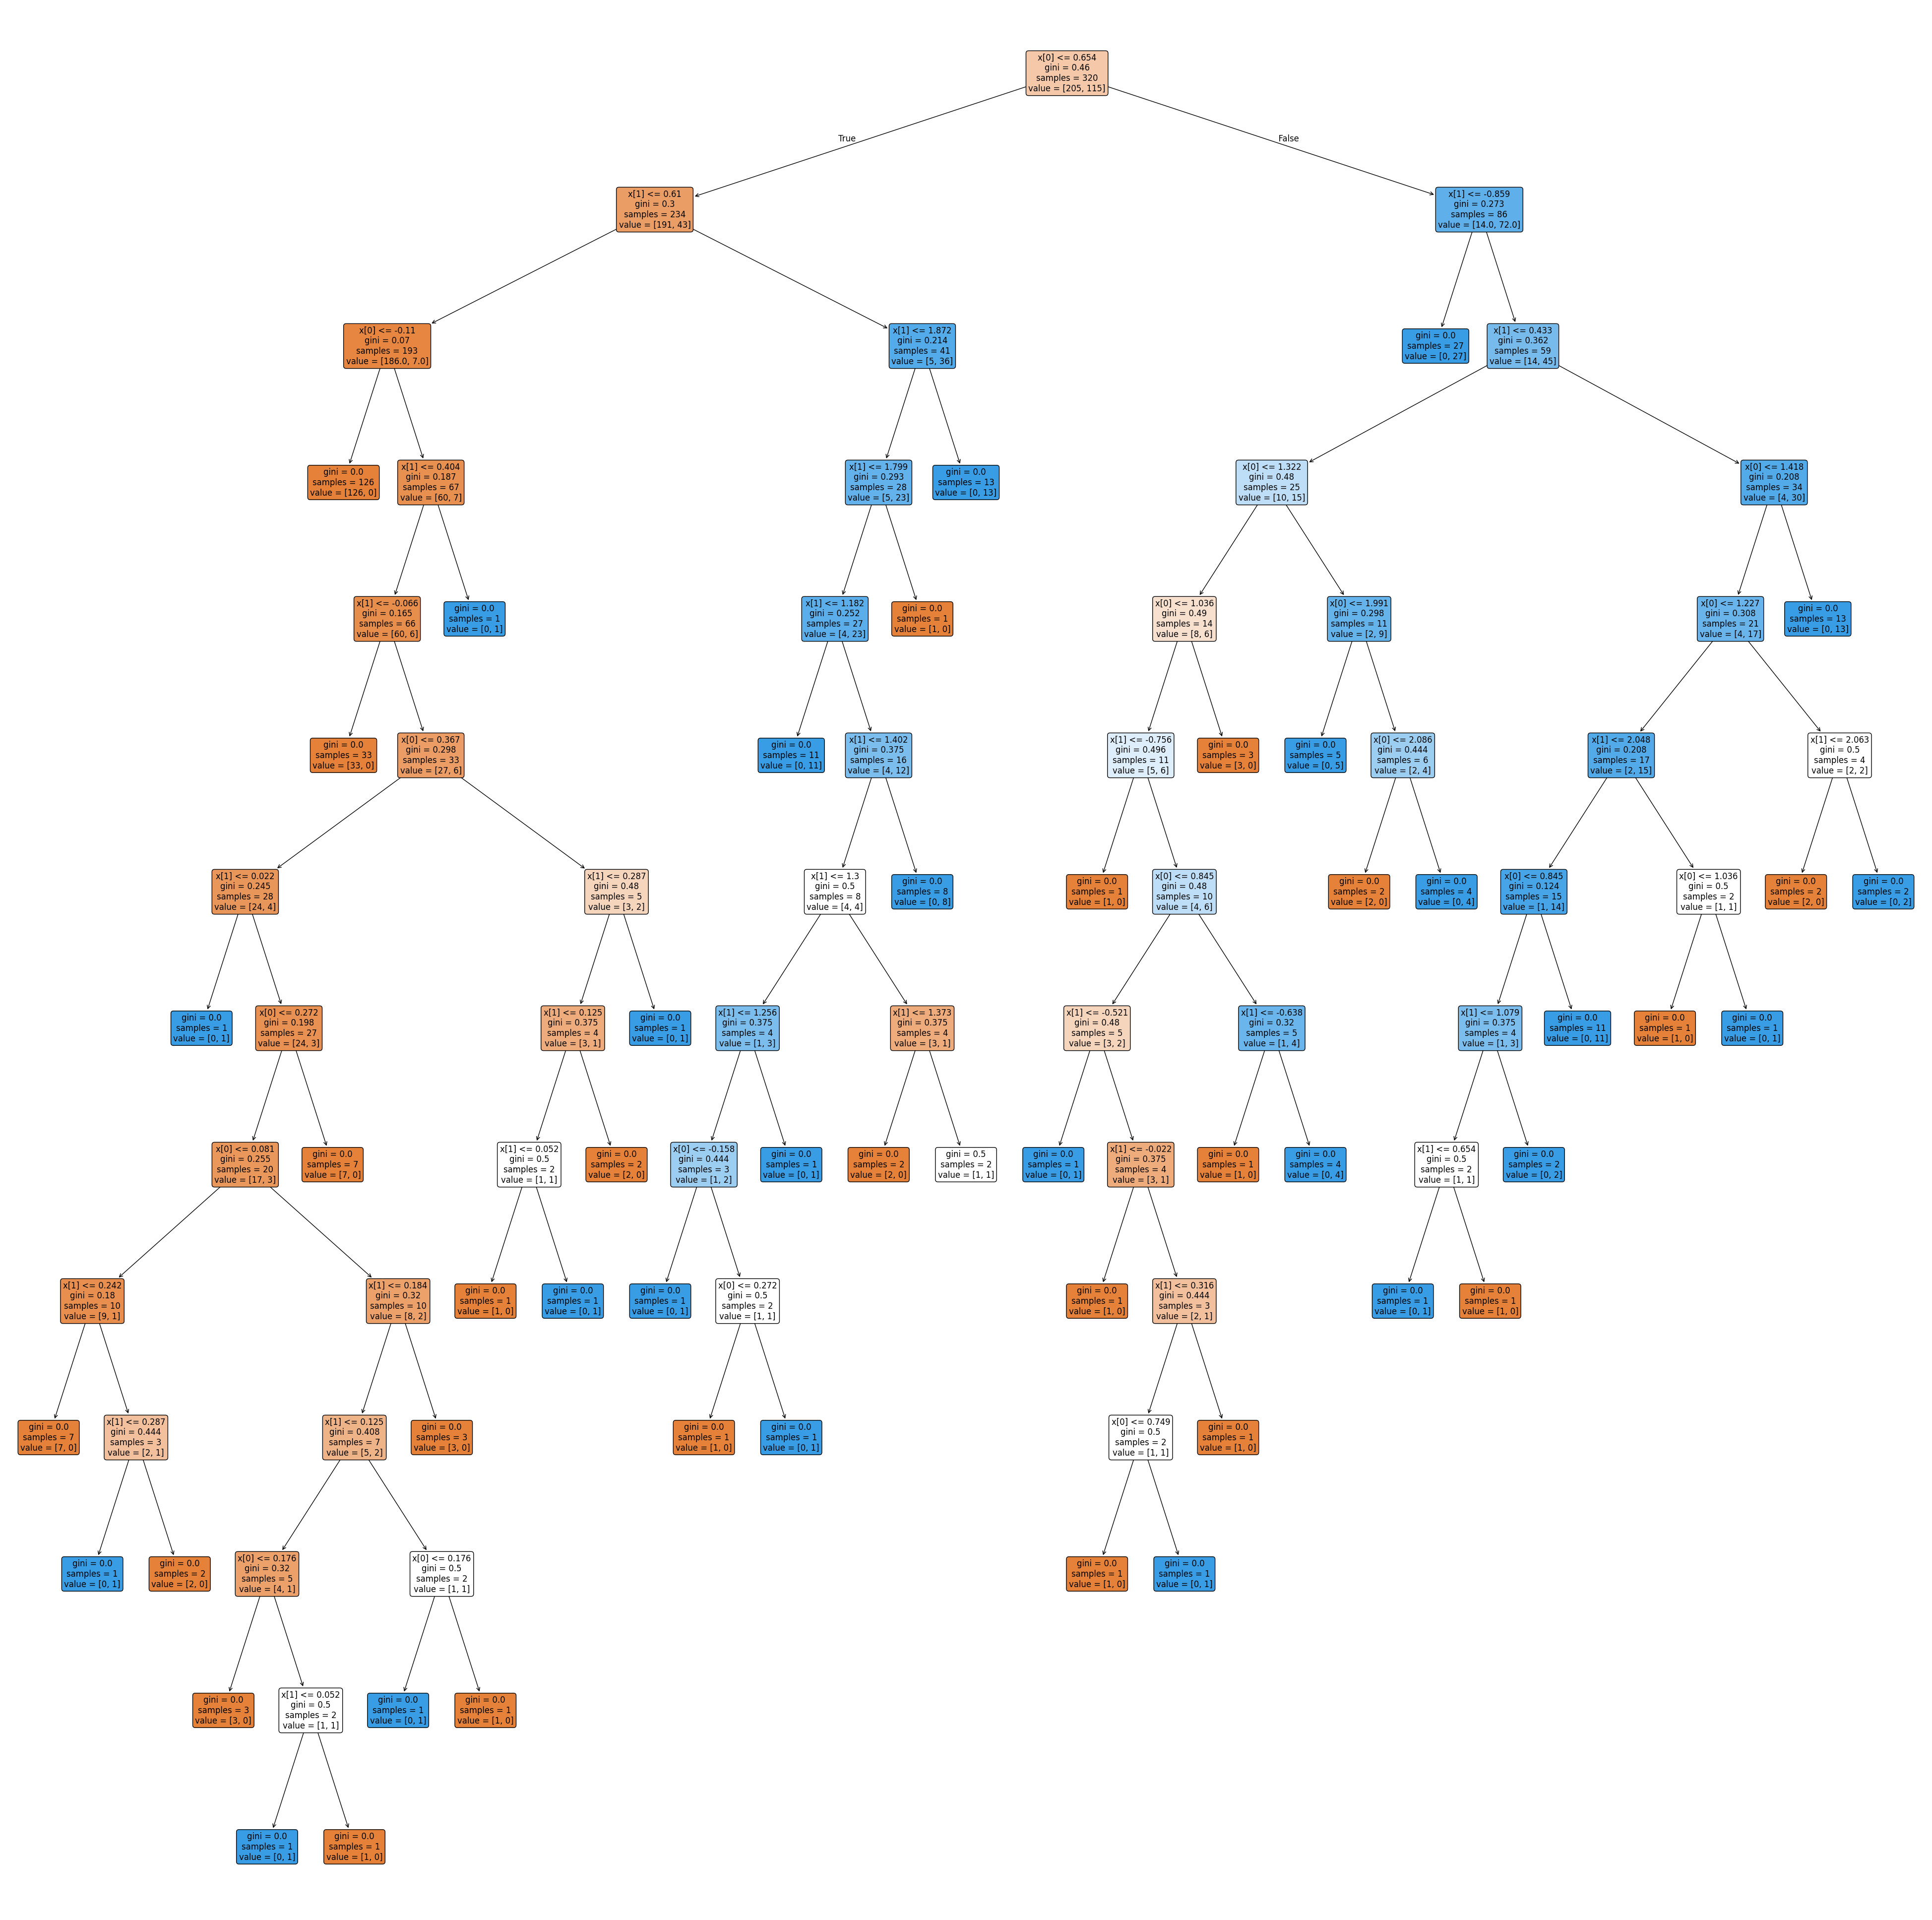

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(dt,filled=True,rounded=True)
plt.show()

In [ ]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt1.score(x_test,y_test)

0.8375

#applying pre pruning


In [ ]:
dt.score(x_train,y_train)

0.996875

In [ ]:
dt.score(x_test,y_test)

0.8375

In [ ]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

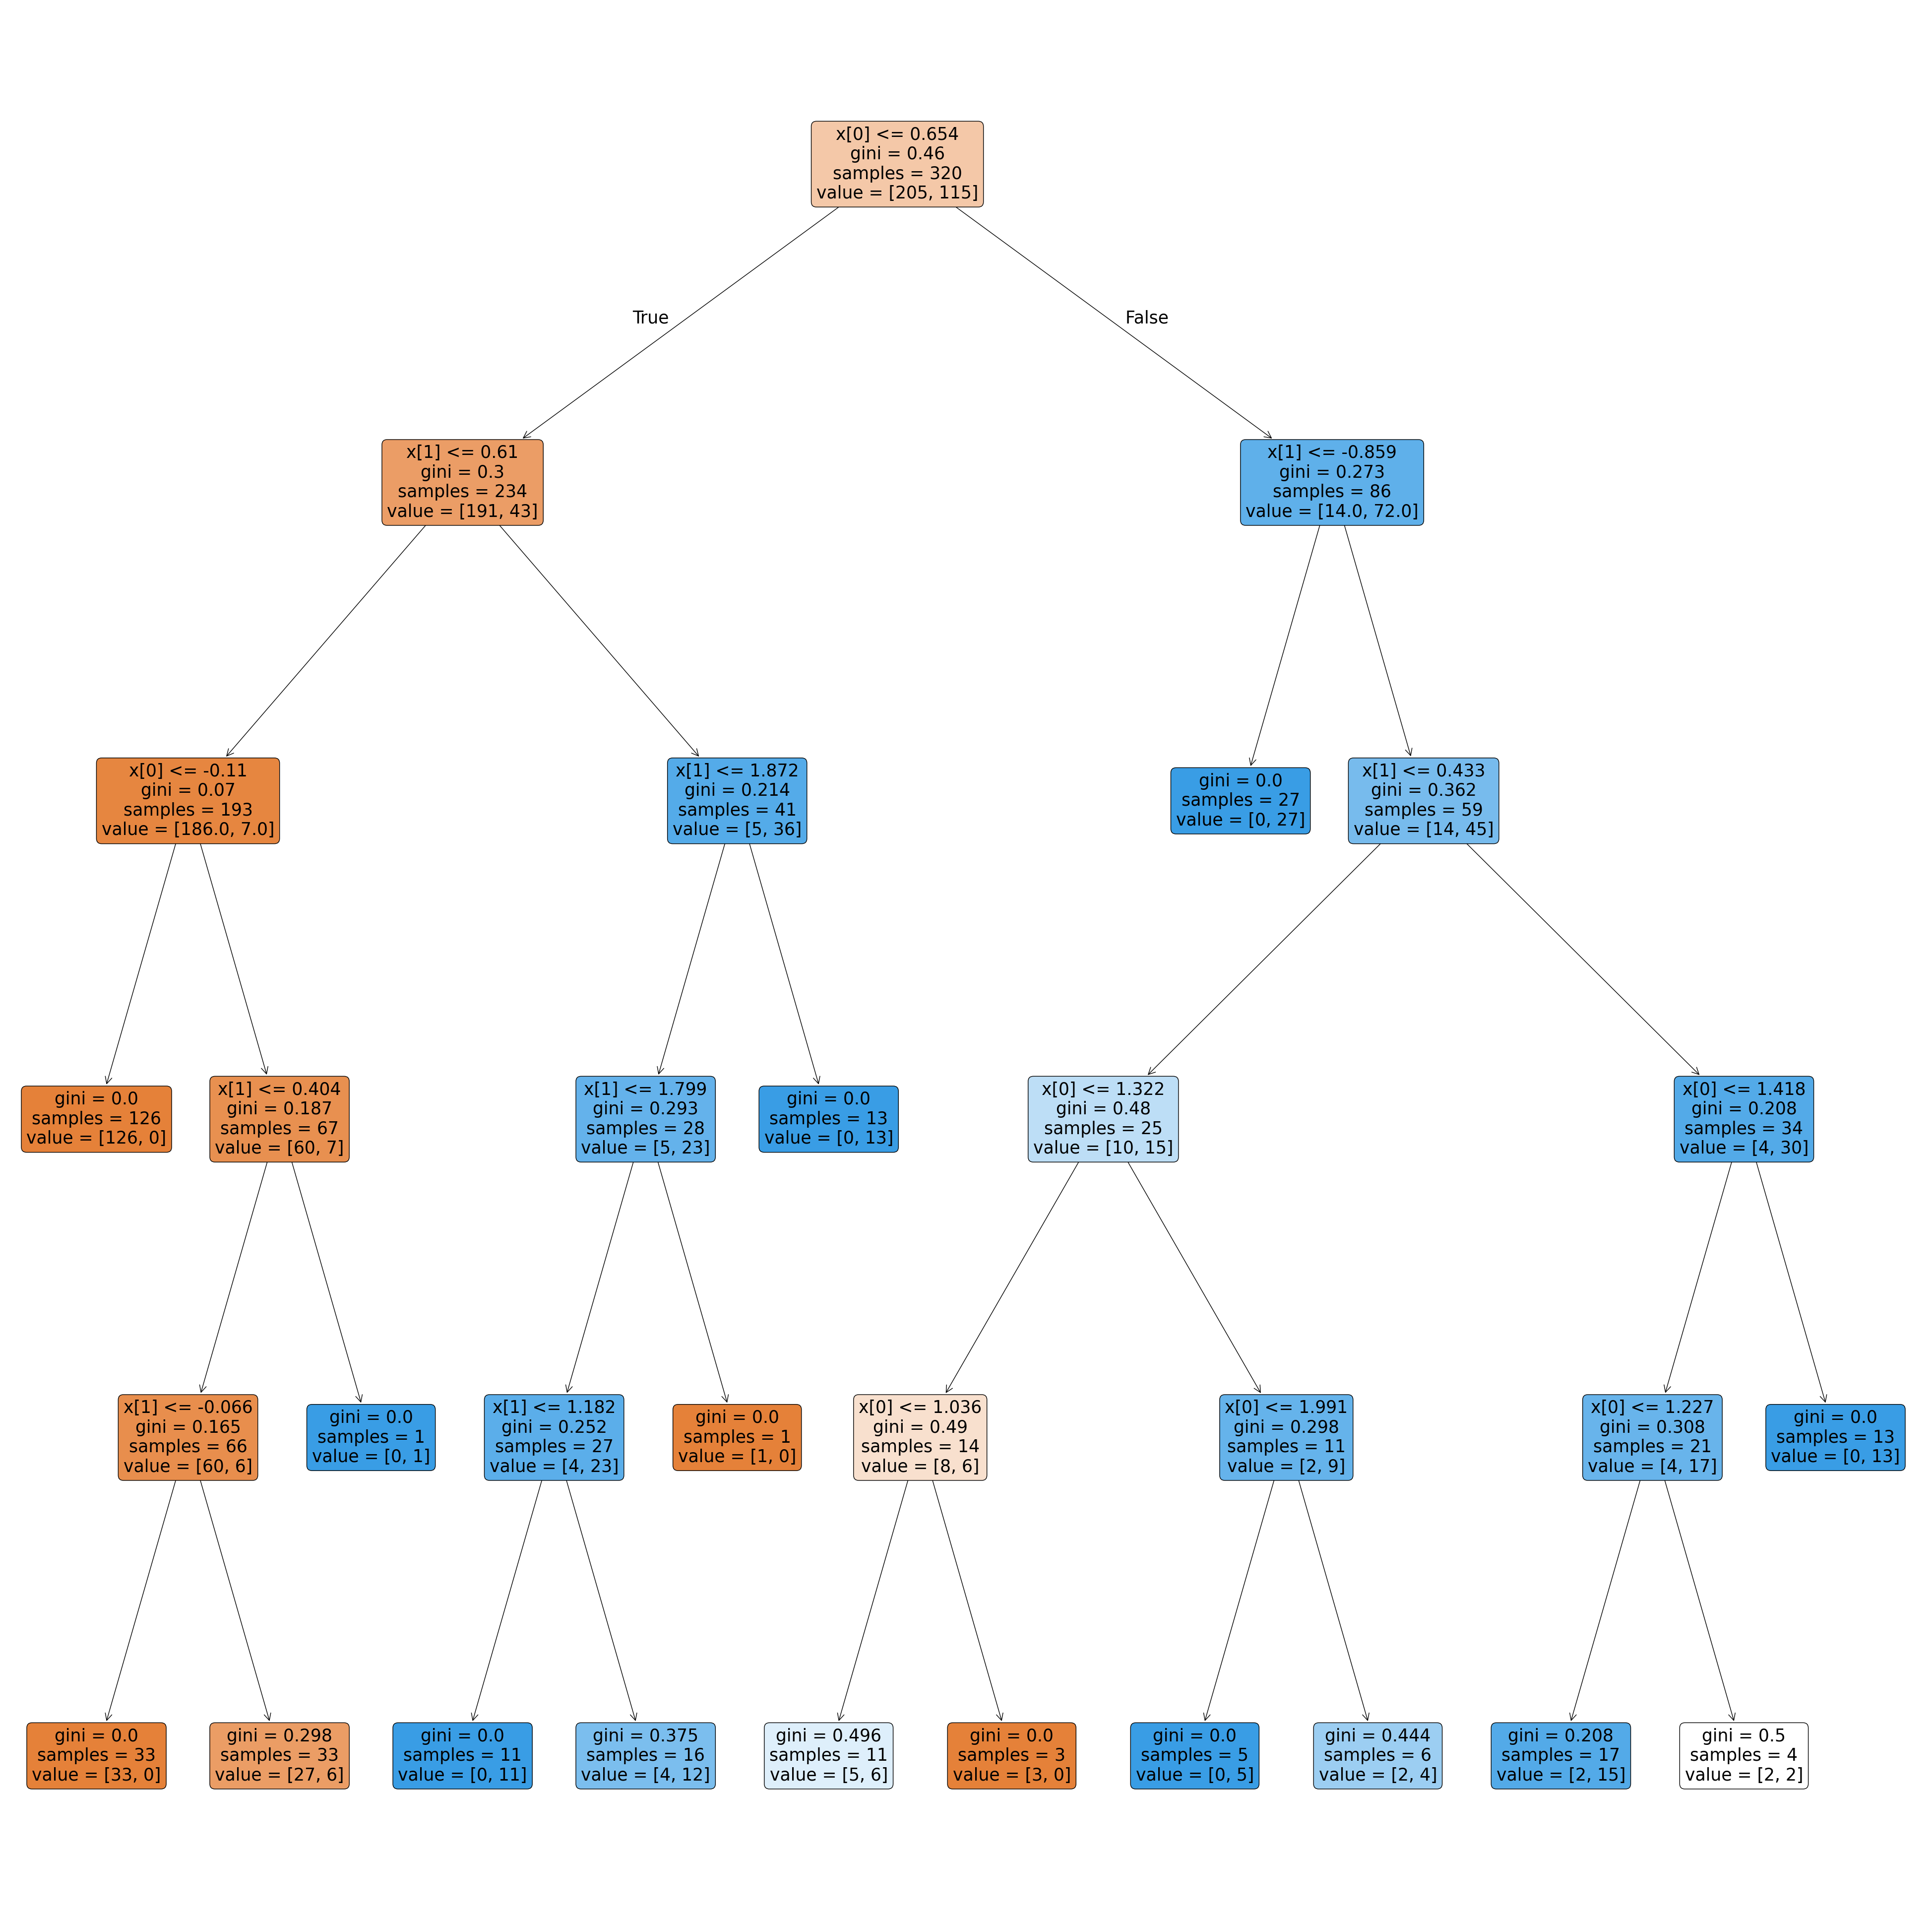

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(dt,filled=True,rounded=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


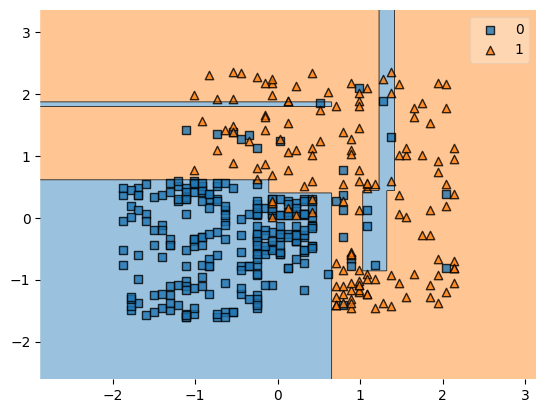

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [ ]:
dt.score(x_train,y_train)

0.934375

In [ ]:
dt.score(x_test,y_test)

0.9

#post purning


In [ ]:
for i in range(1,10):
  dt2=DecisionTreeClassifier(max_depth=i)
  dt2.fit(x_train,y_train)
  print(dt2.score(x_test,y_test),dt2.score(x_train,y_train))

0.9 0.821875
0.9125 0.91875
0.9125 0.91875
0.9125 0.93125
0.9 0.934375
0.8625 0.95
0.85 0.96875
0.85 0.975
0.85 0.98125
